# Tag cloud 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import warnings
import re

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Creating a file object and loading the file path
file = open('/home/awis/Desktop/Spotle_intern/tweets_corona.txt')

# Reading the file
data=file.read()

# Splitting the data over \n
tweets = data.split("\n")

In [4]:
# Importing word_tokenize from nltk library
from nltk.tokenize import word_tokenize

# Tokenizing the tweets data
words = word_tokenize(data)

In [5]:
words

['In',
 'a',
 'major',
 'development',
 ',',
 'as',
 'many',
 'as',
 '17',
 '#',
 'COVID19',
 'patients',
 'in',
 '#',
 'Odisha',
 'have',
 'recovered',
 'and',
 'tested',
 'negative',
 'for',
 'the',
 'virus',
 '.',
 '#',
 'OdishaCares',
 '#',
 'StayHome',
 'https',
 ':',
 '//t.co/odSnNaoPr7',
 'Last',
 'updated',
 ':',
 '2020-05-12',
 '04:05:01+00:00GMT',
 'Coronavirus',
 '[',
 'COVID-19',
 ']',
 'Cases',
 ':',
 '4255954',
 'Deaths',
 ':',
 '287332',
 '#',
 'corona',
 '#',
 'coronavirus',
 '#',
 'COVID19',
 'https',
 ':',
 '//t.co/N4rLWcyfAJ',
 'Bulletin',
 'on',
 '#',
 'COVID19',
 ':',
 '18',
 'new',
 'positive',
 'cases',
 'reported',
 'today',
 ',',
 '427',
 'cases',
 'recovered',
 'till',
 'date',
 'in',
 'JK',
 '@',
 'HealthMedicalE1',
 '@',
 'diprjk',
 '@',
 'kansalrohit69',
 '@',
 'DrSyedSehrish',
 '@',
 'MoHFW_INDIA',
 'https',
 ':',
 '//t.co/pd6BqGDVll',
 '#',
 'Coronavirus',
 '#',
 'IndiaFightsCorona',
 '#',
 'StayHomeStaySafe',
 '#',
 'StayHome',
 'https',
 ':',
 '//t.co/v

In [6]:
# unnecessary words to be removed
garbage=["https",",",".","?","!","@","#","[","]","(",")","...",":","http","-","|","''"]

In [7]:
# removing the unnecessary words
refined_words = [wrd for wrd in words if wrd not in garbage and wrd[0] != "/"]

In [8]:
# word cloud generator
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white",
                        width=1000, height=500, 
                        max_words=200, 
                        stopwords=stopwords, 
                        normalize_plurals=False, 
                        random_state = 1998, 
                        repeat=False).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(15,7.5), facecolor='k')
  plt.axis("off")
  plt.title("Twitter WordCloud",color="white",size=30)
  plt.imshow(wordcloud,interpolation="bilinear")

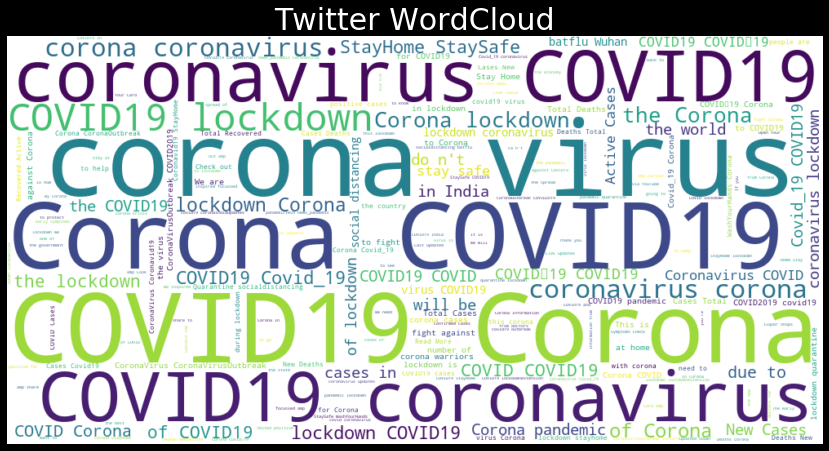

In [9]:
# calling thw word cloud generator
word_cloud(refined_words) 

# Which hashtag trended  ?

In [10]:
raw = ' '.join(tweets)

# Extracting the words starting with hashtags
tags = [i for i in raw.split() if i.startswith("#")]

# Loading the hastags into a dataframe object
df = pd.DataFrame({"hashtag": tags})

# Printing top 10 trending hashtags
print(df['hashtag'].value_counts().head(10))

#COVID19        47590
#Corona         30294
#lockdown       22716
#coronavirus    21159
#corona         19303
#covid19        18425
#Covid19         8294
#Covid_19        6112
#COVIDー19        6047
#StayHome        4781
Name: hashtag, dtype: int64


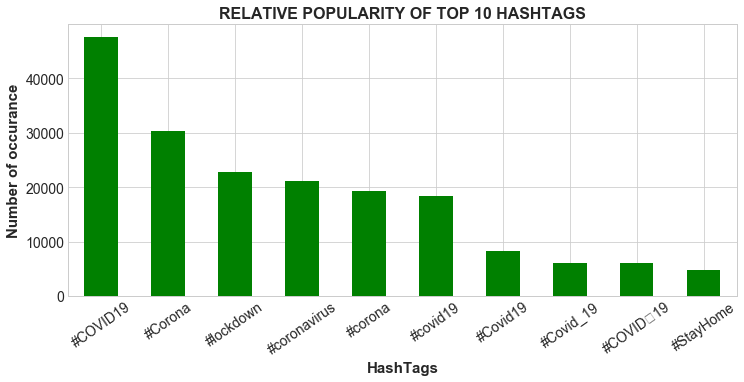

In [11]:
import matplotlib.style as style
style.use('seaborn-whitegrid') #sets the style


# Visualization
df['hashtag'].value_counts().head(10).plot(kind='bar',figsize=(12,5),color='green')
plt.xlabel("HashTags",size=15,weight='bold')
plt.ylabel("Number of occurance",size=15,weight='bold')
plt.title("RELATIVE POPULARITY OF TOP 10 HASHTAGS", size=16, weight='bold')
plt.xticks(rotation=35,size=14)
plt.yticks(size=14)
barplot=plt.show()

# Twitter Handle's which dominated conversation on Twitter

In [12]:
# Extracting the links
links = [i for i in raw.split() if i.startswith("https")]

# Loading the links into a dataframe object
df2 = pd.DataFrame({"handles": links})

# Printing top 10 active links
print(df2['handles'].value_counts().head(10))

https://t.co/RuHYuYBT2Q     522
https://t.co/eL9lQMH27G     522
https://t.co/6UM6MdnCVC     522
https://t.co/AKoWhiIgzU     304
https://t.co/rPAHnZleNT     192
https://t.co/Nue9ZfFujy     192
https://t.co/8rTcbPJqw1.    177
https://t.co/ulkgsJd9du     144
https://t.co/Q3OXeynxQj     144
https://t.co/omgyOrZMTB     144
Name: handles, dtype: int64


#### BARPLOT PRESENTATION

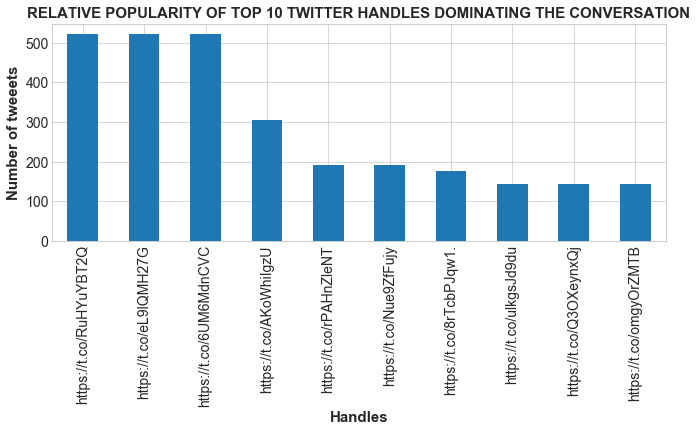

In [13]:
# Visualization
df2['handles'].value_counts().head(10).plot(kind='bar',figsize=(11,4))
plt.xlabel("Handles",size=15,weight='bold')
plt.ylabel("Number of tweeets",size=15,weight='bold')
plt.title("RELATIVE POPULARITY OF TOP 10 TWITTER HANDLES DOMINATING THE CONVERSATION", size=15, weight='bold')
plt.xticks(size=14)
plt.yticks(size=14)
barplot=plt.show()

#### PIECHART PRESENTATION

In [14]:
# Storing data as series
Pie_series=df2['handles'].value_counts().head(10)

# Separating indexes and values
indexes=Pie_series.index
values=Pie_series.values

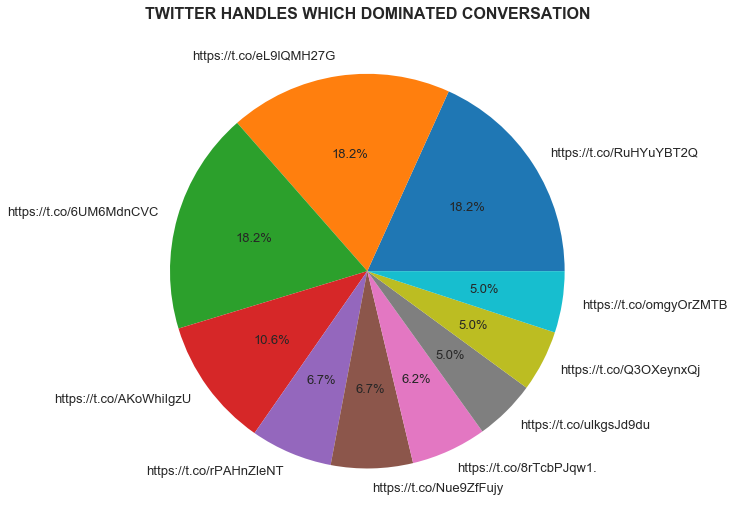

In [15]:
# Pie chart
labels = indexes
sizes = values
fig=plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title("TWITTER HANDLES WHICH DOMINATED CONVERSATION",weight='bold',size=16)
plt.tight_layout()
plt.show()

# Top 10 most tagged Twitter Handle's

In [16]:
# Extracting the handles
links = [i for i in raw.split() if i.startswith("@")]

linksRefined = [i for i in links if i != "@"]        

# Loading the handles into a dataframe object
df3 = pd.DataFrame({"handles": linksRefined})

# Printing top 10 active links
print(df3['handles'].value_counts().head(10))

@narendramodi       1407
@PMOIndia           1295
@realDonaldTrump     831
@YouTube             701
@WHO                 657
@news_pandemic       559
@MoHFW_INDIA         428
@AmitShah            426
@Olacabs             348
@BSYBJP              289
Name: handles, dtype: int64


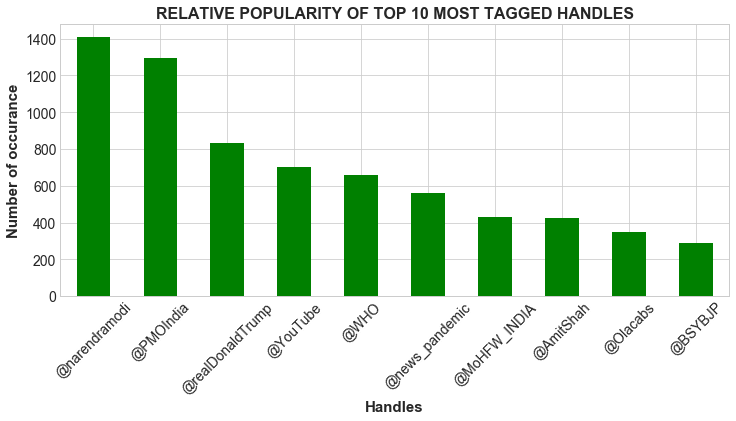

In [17]:
# Visualization
df3['handles'].value_counts().head(10).plot(kind='bar',figsize=(12,5),color='green')
plt.xlabel("Handles",size=15,weight='bold')
plt.ylabel("Number of occurance",size=15,weight='bold')
plt.title("RELATIVE POPULARITY OF TOP 10 MOST TAGGED HANDLES", size=16, weight='bold')
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
barplot=plt.show()

                                                                                Submitted by: Awismrit Parida